In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ugradio
import matplotlib
from matplotlib import ticker

import os

from scipy import stats
import scipy as sp
import math
from scipy.stats import norm
import seaborn as sns

No module named 'rtlsdr'


In [6]:
# ls

In [7]:
# cd data_2023

In [8]:
# ls

In [9]:
cold = np.loadtxt('hornCOLD_1419_906MHzLO_signalRF_maxSamp.gz', dtype = complex)
cal = np.loadtxt('hornHUMAN_1419_906MHzLO_signalRF_maxSamp.gz', dtype = complex)

cold2 = np.loadtxt('hornCOLD_1420_906MHzLO_signalRF_maxSamp.gz', dtype = complex)
cal2 = np.loadtxt('hornHUMAN_1420_906MHzLO_signalRF_maxSamp.gz', dtype = complex)

In [10]:
# ---------- Plot Formatting ---------
plt.rc('font', family='serif', size=14) # you can change fonts
plt.rc('xtick', labelsize=12) # you can change tick sizes
plt.rc('ytick', labelsize=12)
# --------- End Formatting ----------

In [11]:
freqs = np.fft.fftshift(np.fft.fftfreq(2048, 1/3.2))

coldpwr1419 = np.mean(np.abs(np.fft.fftshift(np.fft.fft(cold)))**2, axis =0)
hotpwr1419 = np.mean(np.abs(np.fft.fftshift(np.fft.fft(cal)))**2, axis =0)

coldpwr1420 = np.mean(np.abs(np.fft.fftshift(np.fft.fft(cold2)))**2, axis =0)
hotpwr1420 = np.mean(np.abs(np.fft.fftshift(np.fft.fft(cal2)))**2, axis =0)

In [12]:
np.shape(hotpwr1420)

(2048,)

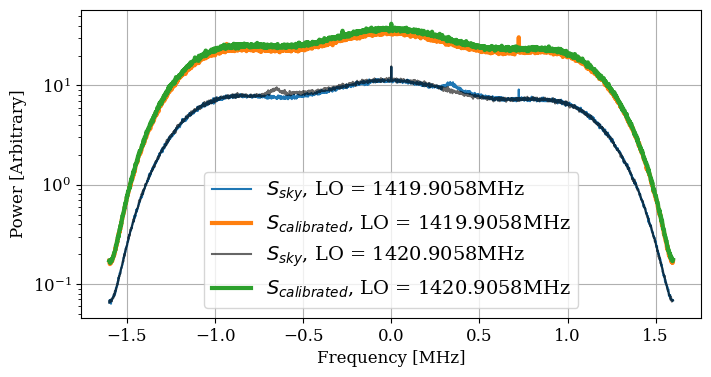

In [13]:
plt.figure(figsize = (8,4))

# plot LO = 1419.906MHz
plt.semilogy(freqs, coldpwr1419, label = '$S_{sky}$, LO = 1419.9058MHz')
plt.semilogy(freqs, hotpwr1419, linewidth = 3, label = '$S_{calibrated}$, LO = 1419.9058MHz')

#plot LO = 1420.906MHz
plt.semilogy(freqs, coldpwr1420, alpha = 0.6, label = '$S_{sky}$, LO = 1420.9058MHz', color = 'black')
plt.semilogy(freqs, hotpwr1420, linewidth = 3, label = '$S_{calibrated}$, LO = 1420.9058MHz')

plt.xlabel('Frequency [MHz]', size=12)
plt.ylabel('Power [Arbitrary]', size=12)

plt.grid()
plt.legend()

plt.show()

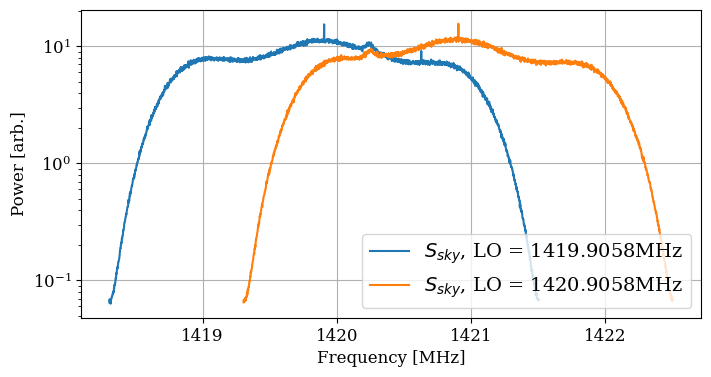

In [14]:
plt.figure(figsize = (8,4))


plt.semilogy(freqs + 1419.9058, coldpwr1419, label = '$S_{sky}$, LO = 1419.9058MHz')
plt.semilogy(freqs + 1420.9058, coldpwr1420, label = '$S_{sky}$, LO = 1420.9058MHz')
# plt.axvline(1420.4058, 0, linestyle = '--')

# plt.title('Power Spectra of Zenith Data')
plt.xlabel('Frequency [MHz]', size=12)
plt.ylabel('Power [arb.]', size=12)

plt.grid()
plt.legend()

plt.show()

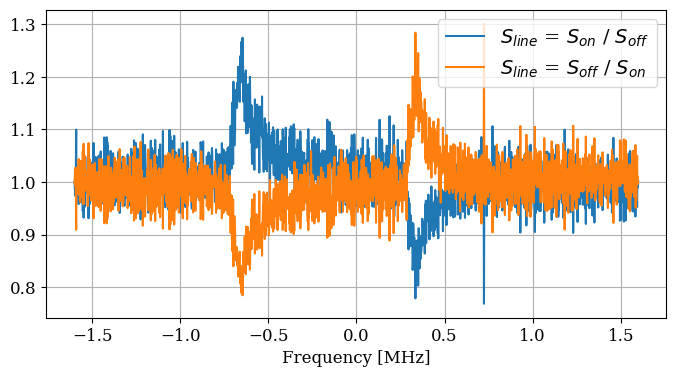

In [15]:
# Section 7.2 Line Shape of Zenith Sky data
s_line1420 = coldpwr1420 / coldpwr1419
s_line1419 = coldpwr1419/coldpwr1420

plt.figure(figsize = (8,4))

plt.plot(freqs, s_line1420, label = '$S_{line}$ = $S_{on}$ / $S_{off}$')
plt.plot(freqs, s_line1419, label = '$S_{line}$ = $S_{off}$ / $S_{on}$')
# plt.plot(freqs, -(s_line - np.median(s_line))*gain1420, label = '$S_{line}$ = $S_{on}$ / $S_{off}$')

# plt.semilogy(freqs, sLine_bb)

# plt.title('Spectral Line of Zenith')
plt.xlabel('Frequency [MHz]', size=12)
# plt.ylabel('Power [Arbitrary]')

plt.legend()
plt.grid()
plt.show()

# Gain Calibration

In [16]:
# Section 7.3 Calculating the Gain
# gain = (Tcal - Tcold) / sum(Scal - Scold) * sum(Scold), where Tcal = 300K
 #gain for 1419.906MHz
# gain1419 = 300*np.sum(coldpwr1419, axis=0) / (np.sum(hotpwr1419 - coldpwr1419))
gain1420 = 300*np.sum(coldpwr1420, axis = 0) / (np.sum(hotpwr1420 - coldpwr1420)) # focus on S_on


# print('Gain = ' +str(gain1419) + ' at LO = 1419.906MHz')
print('Gain = ' +str(gain1420) + ' at LO = 1420.906MHz')

Gain = 137.24732916297714 at LO = 1420.906MHz


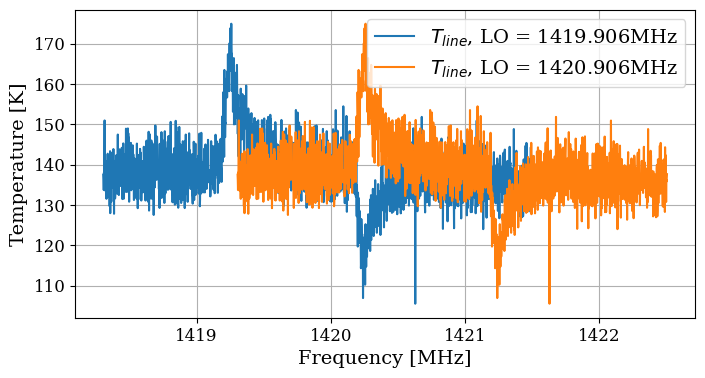

In [17]:
#Section 7.3 + 7.4: T_line = S_line * gain and Calibrated Spectrum vs RF Frequency

# Calculations for T_line at different LO frequencies (Center frequencies)
# T_line1419 = s_line * gain1419
T_line1420 = s_line1420 * gain1420

plt.figure(figsize = (8,4))

# Intensity Calibrated Spectra
plt.plot(freqs + 1419.9058, T_line1420, label = '$T_{line}$, LO = 1419.906MHz')
plt.plot(freqs + 1420.9058, T_line1420, label = '$T_{line}$, LO = 1420.906MHz')

# plt.title('Calibrated Spectrum vs. RF Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')

plt.legend()
plt.grid()
plt.show()

In [18]:
# Section 7.4 Plotting Intensity vs. Freq
freq_HI1 = 1420.4058
c = 3e5 # m/s

delta_freq1419 = (freq_HI1 - 1419.258)
delta_freq1420 = (freq_HI1 - 1420.256) # substacting observed freqs from actual

v1419 = - (delta_freq1419 / freq_HI1) * c
v1420 = - (delta_freq1420 / freq_HI1) * c 

print(str(v1419) + ' km/s' )
print(str(v1420) + ' km/s')

# RECALCULATE VELOCITIES FROM THE ABOVE PLOT, ZENITH DATA

-242.4236792049063 km/s
-31.638845743923415 km/s


In [19]:
# Section 8 off lab
# Cassiopia Data, off (lower frequency)
cass1 = np.load('20230214_19_cas_cf_1419_9058_MHz_nb_2048.npy')
cass2 = np.load('20230214_1933_cas_cf_1419_9058_MHz_nb_2048.npy')
cass3 = np.load('20230214_1934_cas_cf_1419_9058_MHz_nb_2048.npy')
cass4 = np.load('20230214_1938_cas_cf_1419_9058_MHz_nb_2048.npy')
cass5 = np.load('20230214_1939_cas_cf_1419_9058_MHz_nb_2048.npy')
cass6 = np.load('20230214_1942_cas_cf_1419_9058_MHz_nb_2048.npy')
cass7 = np.load('20230214_1946_cas_cf_1419_9058_MHz_nb_2048.npy')
cass8 = np.load('20230214_1948_cas_cf_1419_9058_MHz_nb_2048.npy')
cass9 = np.load('20230214_1949_cas_cf_1419_9058_MHz_nb_2048.npy')
cass10 = np.load('20230214_1951_cas_cf_1419_9058_MHz_nb_2048.npy')

# Cass data, On (High freq)
cass11 = np.load('20230214_1937_cas_cf_1420_9058_MHz_nb_2048.npy')
cass12 = np.load('20230214_1939_cas_cf_1420_9058_MHz_nb_2048.npy')
cass13 = np.load('20230214_1940_cas_cf_1420_9058_MHz_nb_2048.npy')
cass14 = np.load('20230214_1941_cas_cf_1420_9058_MHz_nb_2048.npy')
cass15 = np.load('20230214_1942_cas_cf_1420_9058_MHz_nb_2048.npy')
cass16 = np.load('20230214_1947_cas_cf_1420_9058_MHz_nb_2048.npy')
cass17 = np.load('20230214_1948_cas_cf_1420_9058_MHz_nb_2048.npy')
cass18 = np.load('20230214_1950_cas_cf_1420_9058_MHz_nb_2048.npy')

In [25]:
# vstack
cass_off = np.vstack((cass1, cass2, cass3, cass4, cass5, cass6, cass7, cass8, cass9, cass10))
cass_on = np.vstack((cass11, cass12, cass13, cass14, cass15, cass16, cass17, cass18))

In [26]:
cass_off.shape

(20480, 2048)

In [27]:
# Power of off and on cassiopia data
cass_off_pwr = np.mean(np.abs(np.fft.fftshift(np.fft.fft(cass_off)))**2, axis =0)
cass_on_pwr = np.mean(np.abs(np.fft.fftshift(np.fft.fft(cass_on)))**2, axis =0)

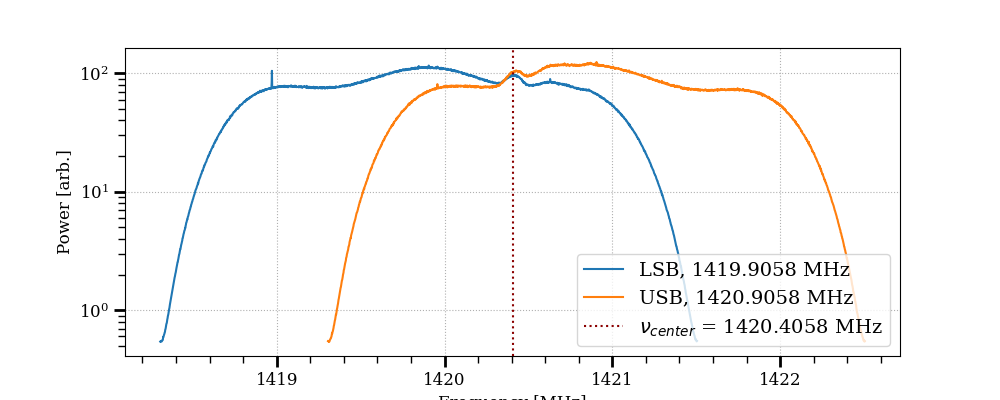

In [47]:
%matplotlib widget
# Power Spectra of Cassiopia Data
plt.figure(figsize =(10,4))

plt.semilogy(freqs + 1419.9058, cass_off_pwr, label = 'LSB, 1419.9058 MHz')
plt.semilogy(freqs + 1420.9058, cass_on_pwr, label = 'USB, 1420.9058 MHz')
plt.axvline(1420.4058, 0, color ='darkred', linestyle =':', linewidth = 1.5, label = '$ν_{center}$ = 1420.4058 MHz')

# plt.title('Power Spectra of Measured HI, Feb. 17th, 2023 7:19pm')
plt.xlabel('Frequency [MHz]', size=12)
plt.ylabel('Power [arb.]', size=12)

plt.tick_params(axis='both', which='major', width=2, length=8)  
plt.tick_params(axis='both', which='minor', width=1, length=5)

plt.minorticks_on()
plt.legend(loc ='lower right')
plt.grid(linestyle=':')
plt.show()

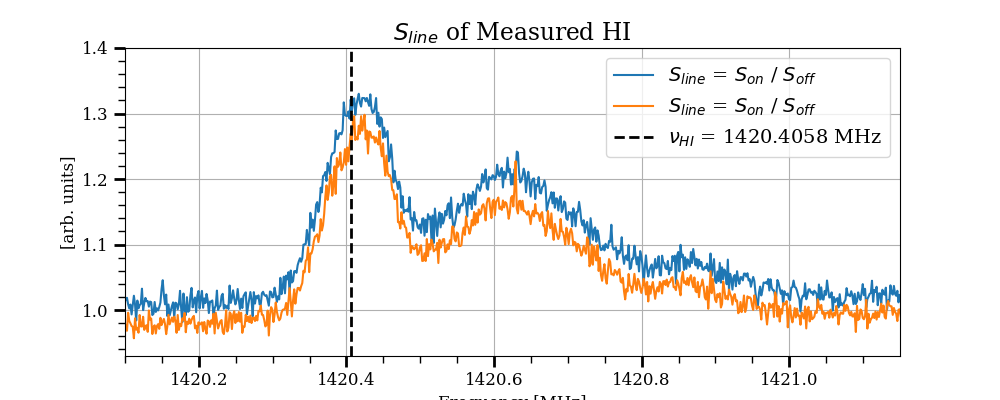

In [48]:
# S_line for Cassiopeia
s_line_cass = cass_on_pwr / cass_off_pwr
s_line_cass_lower = cass_off_pwr / cass_on_pwr

plt.figure(figsize = (10,4))

plt.plot(freqs + 1420.9058, s_line_cass, label = '$S_{line}$ = $S_{on}$ / $S_{off}$')
plt.plot(freqs + 1419.9058, s_line_cass_lower, label = '$S_{line}$ = $S_{on}$ / $S_{off}$')

plt.title('$S_{line}$ of Measured HI')
plt.xlabel('Frequency [MHz]', size = 12)
plt.ylabel('[arb. units]', size = 12)
plt.axvline(1420.4058, 0, color ='k', linestyle ='--', linewidth = 2, label = '$ν_{HI}$ = 1420.4058 MHz')

plt.xlim(1420.1, 1421.15)
plt.ylim(.93, 1.4)

plt.tick_params(axis='both', which='major', width=2, length=8)  
plt.tick_params(axis='both', which='minor', width=1, length=5)

plt.minorticks_on()

plt.grid()
plt.legend(loc='best')
plt.show()

In [49]:
# T_line_cass1419 = s_line_cass * gain1419
T_line_cass1420 = s_line_cass * gain1420   #Focus on S_on
T_line_cass1419 = s_line_cass_lower *gain1420

temperature = T_line_cass1420 - np.median(T_line_cass1420)
temperature1419 = T_line_cass1419 - np.median(T_line_cass1419)

# Removing RFIs, points 415-430 = 0
temperature[415:430] = 0
temperature[1485:1490] = ((((np.sum(temperature[1480:1485]))/5)+((np.sum(temperature[1490:1495]))/5))/2)


## Gaussian Fit, Reduced Chi Squared < 1

In [50]:
# Guassian Fit
freqs2 = np.fft.fftshift(np.fft.fftfreq(2048, 1/3.2))
freqs3 = freqs2[180:1074] + 1420.9058
temperature2 = temperature[180:1074]


ans1, cov = ugradio.gauss.gaussfit(freqs3, 
                              np.abs(temperature2), 
                              amp=[42.5, 27.8, 9.1], 
                              avg=[1420.43, 1420.626, 1420.8], 
                              sig=[0.1, 0.25, 0.005],
                              return_cov = True)

profile1 = ugradio.gauss.gaussval(freqs3,
                                  **ans1)

In [51]:
print(np.sqrt(np.diag(cov)))
# ugradio.gauss.gaussfit?


[0.32925861 0.00049147 0.0004683  0.22380457 0.00174052 0.00239252
 0.24021895 0.00638136 0.00690204]


In [52]:
ans1

{'amp': array([41.98226961, 27.70435463,  8.02524344]),
 'avg': array([1420.41516586, 1420.62267197, 1420.86455697]),
 'sig': array([ 0.04539946,  0.08783957, -0.08478605])}

In [53]:
# chi sqr
# N = 16384

chisq = np.sum(np.abs(temperature2 - profile1)**2)
print(f'Chi-Square: {chisq}')
chisq_r = np.sum(np.abs(temperature2 - profile1)**2) / (freqs3.size-9)
print(f'Reduced Chi-Square: {chisq_r}')


Chi-Square: 2377.5397599054954
Reduced Chi-Square: 2.6864856044129892


In [67]:
residual = temperature2 - profile1

In [54]:
freqs3.size

894

take the std deviation of 

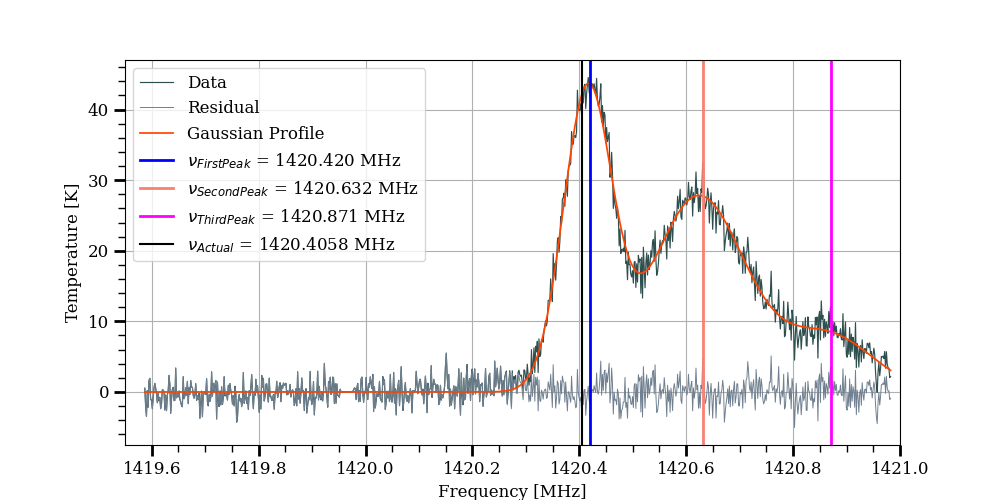

In [109]:
#T_line = S_line * gain and Calibrated Spectrum vs RF Frequency
plt.figure(figsize = (10,5))

# Intensity Calibrated Spectra
# plt.plot(freqs + 1419.9058, T_line_cass1419-gain1420, label = '$T_{line}$, Gain: 137.247, $S_{off}$ = 1419.9058 MHz')
#Gain: 137.247 
plt.plot(freqs3, 
         temperature2, 
         lw=0.85,
         color = 'darkslategrey',
         label = 'Data')


# Residual
plt.plot(freqs3, 
         residual,
         lw=0.70,
         label ='Residual', color = 'slategrey')
         
# Gaussian
plt.plot(freqs3, 
         profile1, 
         color = 'orangered', 
         label='Gaussian Profile', 
         linewidth = 1.25)

# # Observed Hydrogen Lines
plt.axvline(1420.420, 0, color ='blue', linestyle ='-', linewidth = 2, label = '$ν_{First Peak}$ = 1420.420 MHz')
plt.axvline(1420.632, 0, color ='salmon', linestyle ='-', linewidth = 2, label = '$ν_{Second Peak}$ = 1420.632 MHz')
plt.axvline(1420.871, 0, color ='magenta', linestyle ='-', linewidth = 2, label = '$ν_{Third Peak}$ = 1420.871 MHz')
# Actual Hydrogen Line
plt.axvline(1420.4058, 0, color ='black', linestyle ='-', linewidth = 1.5, label = '$ν_{Actual}$ = 1420.4058 MHz')


plt.xlim(1419.55, 1421.0)

# plt.title('Gaussian Fit of Measured HI in Cassiopeia vs. RF Frequency')
plt.xlabel('Frequency [MHz]', size = 12)
plt.ylabel('Temperature [K]', size = 12)

plt.tick_params(axis='both', which='major', width=2, length=8)  
plt.tick_params(axis='both', which='minor', width=1, length=5)

plt.minorticks_on()

plt.legend(fontsize=12, loc='best')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


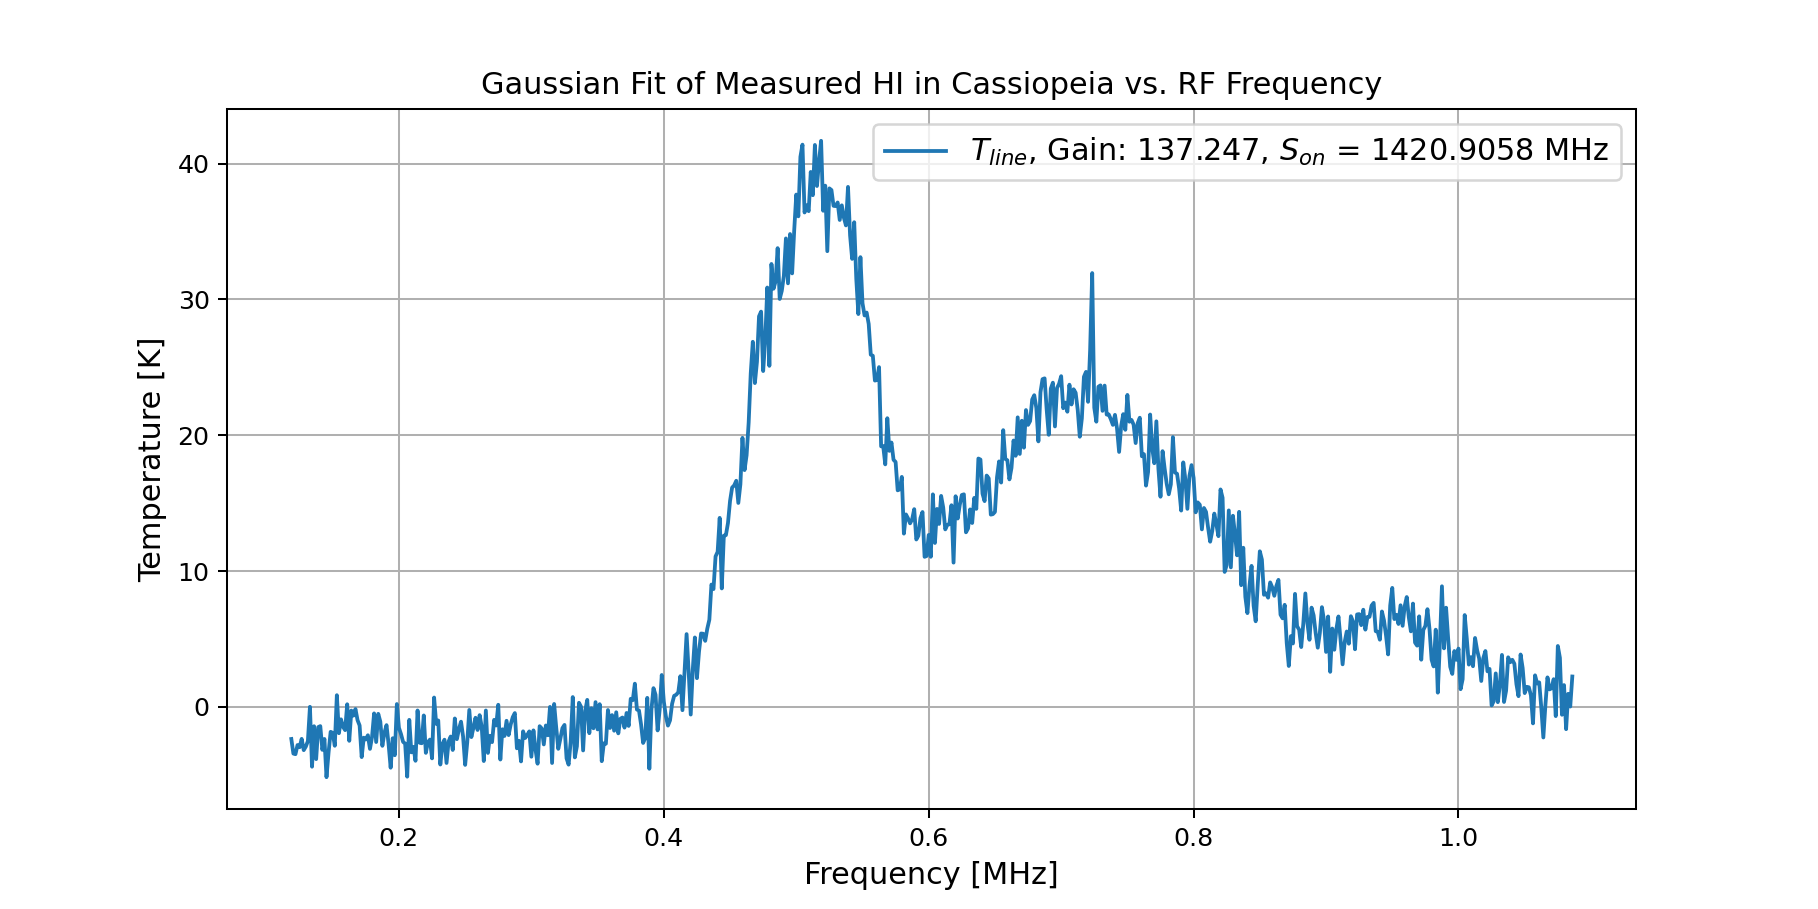

In [541]:
#T_line = S_line * gain and Calibrated Spectrum vs RF Frequency
plt.figure(figsize = (10,5))

# Intensity Calibrated Spectra
plt.plot(freqs[1100:1720], 
         temperature1419[1100:1720], 
         label = '$T_{line}$, Gain: 137.247, $S_{on}$ = 1420.9058 MHz')


# # Residual
# plt.plot(freqs3, 
#          temperature2 - profile1,
#          label ='Residual')
         
# # Gaussian
# plt.plot(freqs3, 
#          profile1, color = 'magenta', label='fit')

# # Observed Hydrogen Lines
# plt.axvline(1420.420, 0, color ='orange', linestyle ='-', linewidth = 2, label = '$ν_{First Peak}$ = 1420.420 MHz')
# plt.axvline(1420.632, 0, color ='k', linestyle ='--', linewidth = 2, label = '$ν_{Second Peak}$ = 1420.632 MHz')
# plt.axvline(1420.871, 0, color ='magenta', linestyle ='--', linewidth = 2, label = '$ν_{Third Peak}$ = 1420.871 MHz')
# # Actual Hydrogen Line
# plt.axvline(1420.4058, 0, color ='red', linestyle ='--', linewidth = 2, label = '$ν_{Actual}$ = 1420.4058 MHz')


# plt.xlim(1419.55, 1421.05)

plt.title('Gaussian Fit of Measured HI in Cassiopeia vs. RF Frequency')
plt.xlabel('Frequency [MHz]', size = 12)
plt.ylabel('Temperature [K]', size = 12)

plt.legend(fontsize=12, loc='best')
plt.grid()
plt.show()

In [110]:
# Cassiopeia RA and Dec
import astropy

cas = astropy.coordinates.SkyCoord.from_name('Cas A')
casra, casdec = cas.ra.deg, cas.dec.deg
casra, casdec

(350.85, 58.815)

In [111]:
julian_ut = ugradio.timing.julian_date(unix_time)


doppler_v = ugradio.doppler.get_projected_velocity(ra = casra, dec = casdec, jd = julian_ut)
UTC = astropy.time.Time('2023-02-17 03:35:00')

NameError: name 'unix_time' is not defined

In [112]:
# Calculating Velocites
vobservatory = -19936.93423672/1000

velocity1420 = -(((freqs + 1420.9058) - 1420.4058)/1420.4058) * c   # upper sideband 
velocity1419 = -(((freqs + 1419.9058) - 1420.4058)/1420.4058) * c   # lower sideband

corrected1420 = velocity1420 + vobservatory
corrected1419 = velocity1419 + vobservatory


In [136]:
residual_std = np.std(residual)
print(residual_std)

1.6305403930443119


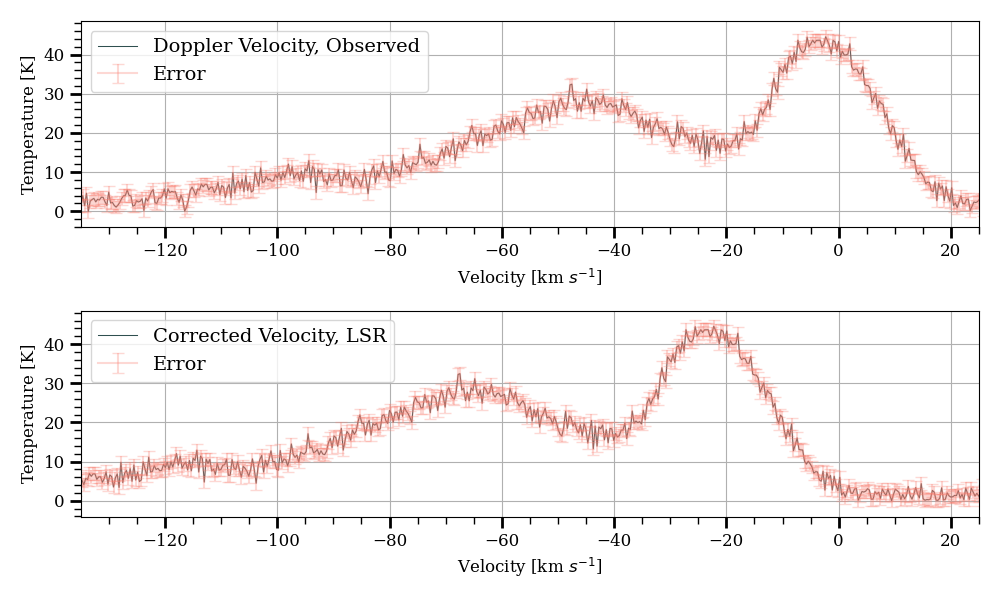

In [159]:
%matplotlib widget



fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(10,6))  # 2 Rows, 1 Column
#top graph
ax1.plot(velocity1420, 
         np.abs(temperature),
         color='darkslategrey',
         lw=0.75,
         label='Doppler Velocity, Observed')

ax1.errorbar(velocity1420, np.abs(temperature), 
             yerr=residual_std, 
             alpha=0.3,
             color='salmon',
             capsize=4,
             label='Error')


ax1.set_xlim(-135, 25)
ax1.set_xlabel('Velocity [km $s^{-1}$]', size=12)
ax1.set_ylabel('Temperature [K]', size=12)
ax1.tick_params(axis='both', which='major', width=2, length=8)  
ax1.tick_params(axis='both', which='minor', width=1, length=5)
ax1.legend(loc='best')
ax1.minorticks_on()

ax1.grid(True)
# ax1.legend()
#bottom graph
ax2.plot(corrected1420,
         np.abs(temperature), 
         color='darkslategrey',
         lw=0.75,
         label='Corrected Velocity, LSR')

ax2.errorbar(corrected1420, np.abs(temperature), 
             yerr=residual_std, 
             alpha=0.3,
             color='salmon',
             capsize=4,
             fmt='-',
             label='Error')

ax2.set_xlim(-135, 25)

ax2.set_xlabel('Velocity [km $s^{-1}$]', size=12)
ax2.set_ylabel('Temperature [K]', size=12)
# ax2.legend()
ax2.tick_params(axis='both', which='major', width=2, length=8)  
ax2.tick_params(axis='both', which='minor', width=1, length=5)
ax2.legend(loc='best')
ax2.minorticks_on()

fig.tight_layout() 
ax2.grid(True)
plt.show()

In [160]:
# calculating velocities of the HI clouds (Dopper Velocities) for S_on (1420.9058 MHz)
v_1stpeak = -((1420.420 - 1420.4058) / (1420.4058)) * c
v_2ndpeak = -((1420.632 - 1420.4058) / (1420.4058)) * c
v_3rdpeak = -((1420.871 - 1420.4058) / (1420.4058)) * c

v_observatory = -19936.93423672/1000 #velocity of observatory obtained from Juliet/Hannah (LSR)

total_velocities = v_observatory + v_1stpeak + v_2ndpeak + v_3rdpeak
avg_velocities = (v_1stpeak + v_2ndpeak + v_3rdpeak + v_observatory)/3


# print('Velocity of observatory with respect to LSR: ' + str(-19936.93423672/1000) + ' km/s')
print('Velocity of HI cloud at first peak with respect to LSR: ' + str(v_1stpeak + v_observatory) + ' km/s')
print('Velocity of HI cloud at second peak with respect to LSR: ' + str(v_2ndpeak + v_observatory) + ' km/s')
print('Velocity of HI cloud at third peak with respect to LSR: ' + str(v_3rdpeak + v_observatory) + ' km/s')

print('Total velocity w/ respect to LSR: ' + str(total_velocities) + ' km/s')
print('Average Velocity of observed HI cloud with respect to LSR: ' + str(avg_velocities) + ' km/s' )
# print('Total velocity of blueshifted HI cloud: ' + str(v_observatory + v1419) + ' km/s')

Velocity of HI cloud at first peak with respect to LSR: -22.93607715772331 km/s
Velocity of HI cloud at second peak with respect to LSR: -67.71201372458098 km/s
Velocity of HI cloud at third peak with respect to LSR: -118.19054598628381 km/s
Total velocity w/ respect to LSR: -168.9647683951481 km/s
Average Velocity of observed HI cloud with respect to LSR: -56.321589465049364 km/s


In [542]:
# Section 9.2 Voltage Scale of SDR, Speed of light in cable, signal loss per meter

bighorn_gain = np.load('p_0dbmrf_1401mhzlo_1400mhz.npy')
sdr = np.load('v_200mvlo_1400mhz2.npy')